In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes= gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

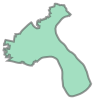

In [4]:
zipcodes.loc[0, 'geometry']

<AxesSubplot:>

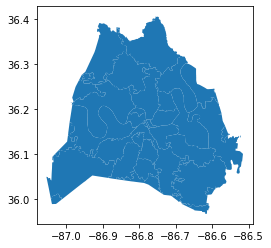

In [5]:
zipcodes.plot()

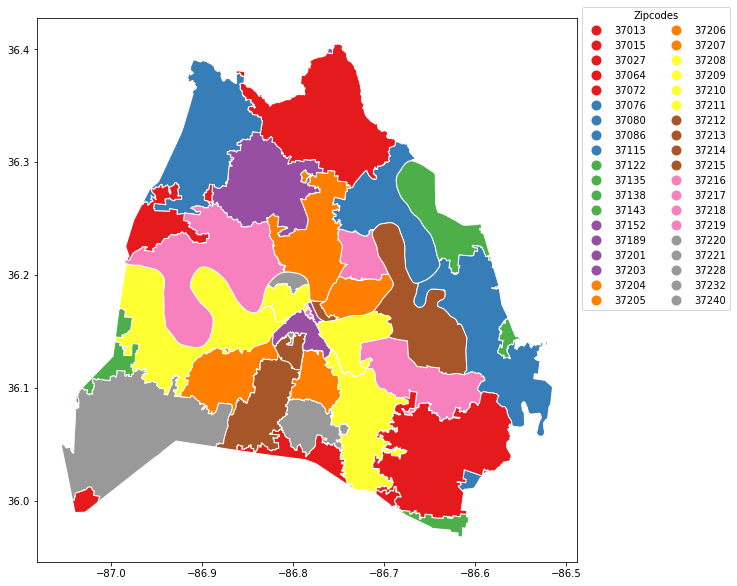

In [6]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'white',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set1')
plt.show()

In [7]:
#37027 is Brentwood. Up until this point it was the same as presentation
Firestation = pd.read_csv('../data/Fire_Stations.csv')
print(Firestation.shape)
Firestation.head(3)

(39, 6)


,Station Number,Street Address,City,State,ZIP Code,Mapped Location
0,Station 6,377 Haywood Lane,Nashville,TN,37211,"377 Haywood Lane\nNashville, TN 37211\n(36.068..."
1,Station 12,101 Polk Avenue,Nashville,TN,37210,"101 Polk Avenue\nNashville, TN 37210\n(36.1413..."
2,Station 13,410 45th Avenue North,Nashville,TN,37209,"410 45th Avenue North\nNashville, TN 37209\n(3..."


In [8]:
Firestation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Station Number   39 non-null     object
 1   Street Address   39 non-null     object
 2   City             39 non-null     object
 3   State            39 non-null     object
 4   ZIP Code         39 non-null     int64 
 5   Mapped Location  38 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [9]:
#comparisons...seems I don't have long and lat. will a address work?

#bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
#bus_stops.info()

#ignore all of this.
#Fires= Firestation['Mapped Location'].str.split("36").lstrip()[-2]
#Fires.lstrip("\n(")
#print(Firestation['Mapped Location'])


In [10]:
# new data frame with split value columns
new = Firestation["Mapped Location"].str.split(",", n = 1, expand = True)
  
# making separate first name column from new data frame
Firestation["lng"]= new[0]
  
# making separate last name column from new data frame
Firestation["lat"]= new[1]
  
# Dropping old Name columns
#Firestation.drop(columns =["Mapped Location"], inplace = True)

In [11]:
print(Firestation)
Firestation.info()

   Station Number               Street Address            City State  \
0       Station 6             377 Haywood Lane       Nashville    TN   
1      Station 12              101 Polk Avenue       Nashville    TN   
2      Station 13        410 45th Avenue North       Nashville    TN   
3      Station 34        8350 Highway 70 South       Nashville    TN   
4      Station 31           415 Douglas Avenue         Madison    TN   
5       Station 4           5111 Harding Place       Nashville    TN   
6       Station 1         130 Broadmoor Avenue       Nashville    TN   
7      Station 10      15530 Old Hickory Blvd.       Nashville    TN   
8      Station 18       1151 East Cahal Avenue       Nashville    TN   
9      Station 29           4201 Gallatin Road       Nashville    TN   
10     Station 21            320 Joyner Avenue       Nashville    TN   
11     Station 26      5410 Hickory Park Drive         Antioch    TN   
12     Station 22         2781 Pennington Bend       Nashville  

I am abandoning the firestations. They have crashed and burned and the only way to put them out is to move on

In [12]:
bikes= pd.read_csv('../data/BikeRacks.csv')
bikes.head(1)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept


In [13]:
bikes['geometry'] = bikes.apply(lambda x: Point((x.LON, 
                                                         x.LAT)), 
                                        axis=1)
bikes.head(3)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.6554527779 36.0499277778)
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.1852800378)
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)


In [14]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
bike_geo = gpd.GeoDataFrame(bikes, 
                           crs = zipcodes.crs, 
                           geometry = bikes['geometry'])

In [16]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

In [17]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [18]:
stops_by_zip = gpd.sjoin(bike_geo, zipcodes, op = 'within')

In [19]:
stops_by_zip.head(1)

,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,zip,po_name
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545 36.04993),51,37013,ANTIOCH


In [20]:
stops_by_zip['zip'].value_counts()

37203    51
37201    44
37206    36
37209    31
37219    29
37208    28
37207    21
37210    20
37211    17
37216    17
37013    16
37115    16
37214    15
37076    13
37218    10
37221    10
37228     8
37217     8
37212     7
37205     7
37213     5
37204     4
37215     3
37138     3
37220     3
37189     2
37080     1
37072     1
Name: zip, dtype: int64

In [21]:
towns_not_big_enough = stops_by_zip.loc[stops_by_zip['zip'] == '37072']
towns_not_big_enough.shape

(1, 17)

In [22]:
high_noon = zipcodes.loc[zipcodes['zip'] == '37072']
high_noon.shape

(3, 3)

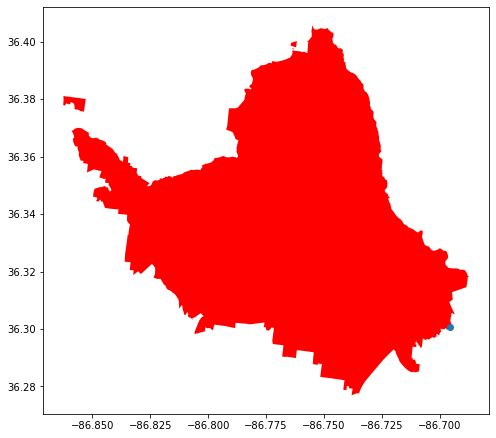

In [23]:
ax = high_noon.plot(figsize = (8, 10), color = 'red')
towns_not_big_enough.plot( ax = ax);
plt.show();

Clearly this is a one bike town. This city ain't big enough for two bikes, so the only way through Goodlettsville is cycling out of Goodlettsville. 

In [24]:
dots = stops_by_zip.loc[stops_by_zip['zip'] == '37203']
dots.shape

(51, 17)

In [25]:
area_203 = zipcodes.loc[zipcodes['zip'] == '37203']
area_203.shape

(1, 3)

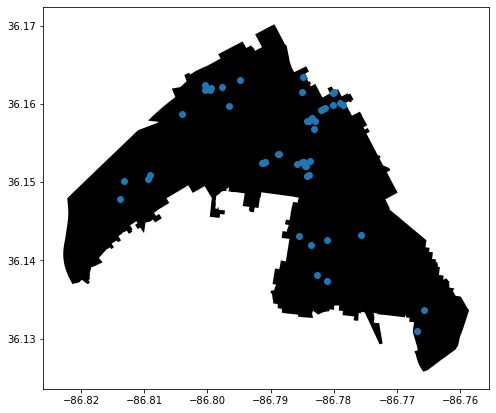

In [26]:
ax = area_203.plot(figsize = (8, 10), color = 'black')
dots.plot( ax = ax);
plt.show();

In [27]:
center = area_203.geometry.centroid
#I think we're supposed to ignor this userwarning message because I still got a coordinate output.

C:\Users\pcunn\AppData\Local\Temp\ipykernel_1600\3524657277.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = area_203.geometry.centroid


In [28]:
#bike_rack_map = folium.Map(location = center, zoom_start = 12)
#I believe I missed a step. Let's try defining coordinates first. 
coord_center = [center.y, center.x]
bike_rack_map = folium.Map(location = coord_center, zoom_start = 12)

In [29]:
print(bike_rack_map)

In [30]:
bike_rack_map


In [31]:
uap = pd.read_excel('https://query.data.world/s/brwcqeyvq5izsf6zsdy4xnheu7wo4t')

In [32]:
print(uap)

              Date / Time Country        City State     Shape  \
0          12/21/16 19:15     USA  Waynesboro    VA    Sphere   
1          12/21/16 00:00     USA  Louisville    KY   Unknown   
2          12/20/16 22:30     USA  Santa Rosa    CA    Sphere   
3          12/20/16 19:00     USA      Fresno    CA    Circle   
4          12/19/16 21:53     USA     Reymert    AZ    Circle   
...                   ...     ...         ...   ...       ...   
5172  2016-01-01 00:00:00     USA   Elk Grove    CA     Light   
5173  2016-01-01 00:00:00     USA   Anchorage    AK    Circle   
5174  2016-01-01 00:00:00     USA   Sodaville    OR    Sphere   
5175  2016-01-01 00:00:00     USA      Arnold    MO  Triangle   
5176  2016-01-01 00:00:00     USA      Vernon    CT    Sphere   

                                                Summary        lat         lng  
0                  Bright round object hovering in sky.  38.065229  -78.905888  
1     Multiple craft ascending from north of Shelbyv...  

In [33]:
uap = uap[['City', 'State', 'Shape', 'lat', 'lng']]
AP_TN = uap.loc[uap['State'] == 'TN']

In [34]:
uap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    5177 non-null   object 
 1   State   5177 non-null   object 
 2   Shape   5177 non-null   object 
 3   lat     5177 non-null   float64
 4   lng     5177 non-null   float64
dtypes: float64(2), object(3)
memory usage: 202.4+ KB


In [35]:
AP_TN['City'].value_counts()

Knoxville       11
Nashville       10
Murfreesboro     6
Memphis          4
Bristol          3
                ..
Hermitage        1
Harrogate        1
Clinton          1
Pigeon Forge     1
Seymour          1
Name: City, Length: 63, dtype: int64

In [36]:
AP_Nash = AP_TN.loc[AP_TN['City']== 'Nashville']

In [37]:
AP_Nash['geometry'] = AP_TN.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
AP_Nash.head(3);

C:\Users\pcunn\AppData\Local\Temp\ipykernel_1600\47260766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_Nash['geometry'] = AP_TN.apply(lambda x: Point((x.lng,


In [38]:
geo_unknown = gpd.GeoDataFrame(AP_TN, 
                           crs = zipcodes.crs, 
                           geometry = AP_Nash['geometry'])

In [39]:
geo_unknown.shape

(108, 6)

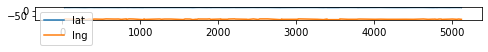

In [40]:
ax = area_203.plot(figsize = (8, 10), color = 'magenta')
AP_TN.plot( ax = ax);
plt.show();
#hmm...a flat bar, not what I was hoping for

In [41]:
I_want_to_believe = gpd.sjoin(geo_unknown, zipcodes, op = 'within')

In [42]:
I_want_to_believe.head()

,City,State,Shape,lat,lng,geometry,index_right,zip,po_name
328,Nashville,TN,Changing,36.16223,-86.774353,POINT (-86.77435 36.16223),36,37201,NASHVILLE
752,Nashville,TN,Diamond,36.16223,-86.774353,POINT (-86.77435 36.16223),36,37201,NASHVILLE
761,Nashville,TN,Light,36.16223,-86.774353,POINT (-86.77435 36.16223),36,37201,NASHVILLE
822,Nashville,TN,Triangle,36.16223,-86.774353,POINT (-86.77435 36.16223),36,37201,NASHVILLE
1268,Nashville,TN,Diamond,36.16223,-86.774353,POINT (-86.77435 36.16223),36,37201,NASHVILLE


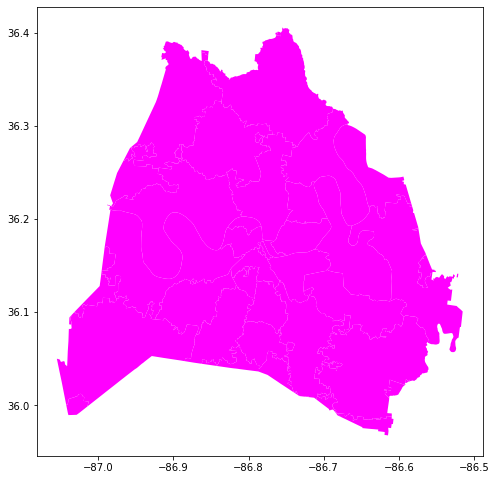

In [43]:
ax = zipcodes.plot(figsize = (8, 10), color = 'magenta')
#I_want_to_believe.plot( ax = ax, column = 'geometry');
plt.show();
##I realized I was thinking too narrow. I have cities, but no zip or streets for UFO data. Do all of TN. 

In [44]:
geo_unknown['Shape'].value_counts()

Light        24
Circle       19
Triangle     14
Unknown       9
Other         5
Changing      5
Fireball      5
Disk          4
Diamond       4
Formation     4
Sphere        4
Rectangle     3
Oval          3
Flash         2
Cone          1
Teardrop      1
Cigar         1
Name: Shape, dtype: int64

In [45]:
zipcodes = folium.Map(location =  coord_center, zoom_start = 8)
zipcodes

In [46]:
AP_TN.shape


(108, 6)

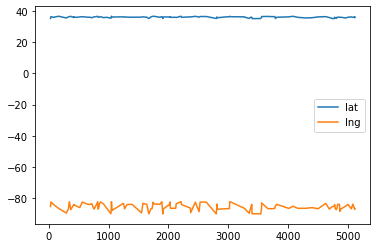

In [47]:
zipcodes = folium.Map(location =  coord_center, zoom_start = 8)
AP_TN.plot();
plt.show();

In [48]:
print(zipcodes)

In [49]:
Tenn = gpd.read_file('../data/county/tncounty.shp')

In [50]:
uap
AP_TN

,City,State,Shape,lat,lng,geometry
29,Hixson,TN,Other,35.236207,-85.298206,None
36,Johnson City,TN,Triangle,36.313440,-82.353473,None
85,Farragut,TN,Light,35.884524,-84.153526,None
100,Lancing,TN,Diamond,36.120631,-84.653831,None
165,Portland,TN,Light,36.581709,-86.516383,None
...,...,...,...,...,...,...
5061,Nashville,TN,Light,36.162230,-86.774353,POINT (-86.77435 36.16223)
5086,Seymour,TN,Changing,35.881048,-83.776618,None
5114,Nashville,TN,Changing,36.162230,-86.774353,POINT (-86.77435 36.16223)
5119,Gallatin,TN,Triangle,36.388303,-86.447590,None


In [51]:
quit_naming_stuff = pd.concat([Tenn, AP_TN])
quit_naming_stuff.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,City,State,Shape,lat,lng
0,76.0,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",NaN,NaN,NaN,NaN,NaN
1,77.0,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",NaN,NaN,NaN,NaN,NaN
2,78.0,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",NaN,NaN,NaN,NaN,NaN
3,79.0,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",NaN,NaN,NaN,NaN,NaN
4,80.0,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

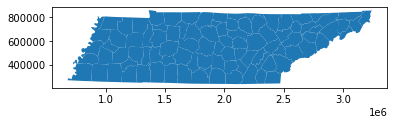

In [52]:
Tenn.plot()

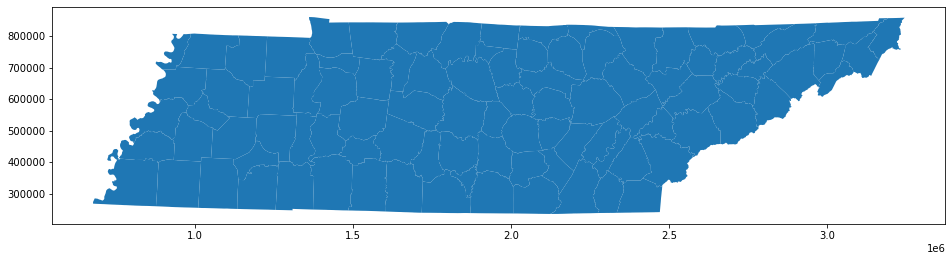

In [53]:
fig, ax = plt.subplots(figsize=(16,4))
Tenn.plot(ax = ax);

In [88]:
Tenn.crs

<Projected CRS: EPSG:2274>
Name: NAD83 / Tennessee (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Tennessee
- bounds: (-90.31, 34.98, -81.65, 36.68)
Coordinate Operation:
- name: SPCS83 Tennessee zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [54]:
AP_TN['City'].value_counts()

Knoxville       11
Nashville       10
Murfreesboro     6
Memphis          4
Bristol          3
                ..
Hermitage        1
Harrogate        1
Clinton          1
Pigeon Forge     1
Seymour          1
Name: City, Length: 63, dtype: int64

#### NONE OF THIS WORKED. TRYING AGAIN FURTHER DOWN

In [55]:
#AP_TN['County'] = AP_TN.apply(lambda row: 
#     'Anderson' if row['City'] == "Andersonville"|"Clinton"|"Oak Ridge"
#                              elif row['City'] == "Rover"|"Shelbyville":
#         return 'Bedford'
#     elif row['City'] =='Maryville':
#         return 'Blount'
#     elif row['City'] =='Charleston'|'Cleveland':
#         return 'Bradley'
#     elif row['City'] =='Ivy Bluff':
#         return 'Cannon'
#     elif row['City'] =='Huntingdon'|'Trezevant':
#         return 'Carroll'
#     elif row['City'] =='Elizabethton':
#         return 'Carter'
#     elif row['City'] =='Hendersonville':
#         return 'Chester'
#     elif row['City'] =='Harrogate':
#         return 'Claiborne'
#     elif row['City'] =='Bybee':
#         return 'Cocke'
#     elif row['City'] =='Lake Tansi':
#           return 'Cumberland'
#     elif row['City'] =='Antioch'|'Bellevue'|'Goodlettsville'|'Hermitage'|'Nashville':
#         return 'Davidson'
#     elif row['City'] =='Dyersburg'|'Newbern':
#         return 'Dyer'
#     elif row['City'] =='Bean Station'|'Blaine':
#         return 'Grainger'
#     elif row['City'] =='Lupton City'|'Hixson':
#         return 'Hamilton'
#     elif row['City'] =='Rogersville':
#         return 'Hawkins'
#     elif row['City'] =='Waverly':
#         return 'Humphreys'
#     elif row['City'] =='Farragut'|'Knoxville':
#         return 'Knox'
#     elif row['City'] =='Powell':
#         return 'Marion'
#     elif row['City'] =='Columbia'|'Spring hill':
#         return 'Maury'
#     elif row['City'] =='Ten Mile':
#         return 'Meigs'
#     elif row['City'] =='Clarksville':
#         return 'Montgomery'
#     elif row['City'] =='Lancing':
#         return 'Morgan'
#     elif row['City'] =='Byrdstown':
#         return 'Pickett'
#     elif row['City'] =='Dayton'|'Gray':
#         return 'Rhea'
#     elif row['City'] =='White House':
#         return 'Robertson'
#     elif row['City'] =='Murfreesboro'|'Smyrna':
#         return 'Rutherford'
#     elif row['City'] =='Mt. Juliet'|'Lebanon':
#         return 'Wilson'
#     elif row['City'] =='Franklin':
#         return 'Williamson'
#     elif row['City'] =='Jonesborough':
#         return 'Washington'
#     elif row['City'] =='Morristown':
#         return 'Warren'
#     elif row['City'] =='Gallatin'|'Portland':
#         return 'Sumner'
#     elif row['City'] =='Kingsport'|'Johnson City'|'Bristol'|'Blountville':
#         return 'Sullivan'
#     elif row['City'] =='Gordonsville':
#         return 'Smith'
#     elif row['City'] =='Eads'|'Memphis'| 'Millington':
#         return 'Shelby'
#     else:
#         return 'Sevier')

In [56]:
AP_TN.loc[(AP_TN['City']=="Andersonville") | (AP_TN['City']=="Clinton") | (AP_TN['City']=="Oak Ridge"), 'County_'] = 'Anderson'
AP_TN.loc[(AP_TN['City']=="Rover") | (AP_TN['City']=="Shelbyville"), 'County_'] = 'Bedford'
AP_TN.loc[(AP_TN['City']=='Maryville'), "County_"] = 'Blount'
AP_TN.loc[(AP_TN['City']=='Charleston') | (AP_TN['City']=='Cleveland'), 'County_' ]= 'Bradley'
AP_TN.loc[(AP_TN['City']=='Ivy Bluff'), "County_" ]= 'Cannon'
AP_TN.loc[(AP_TN['City']=='Huntingdon') | (AP_TN['City']=='Trezevant'), 'County_' ]= 'Carroll'
AP_TN.loc[(AP_TN['City']=='Elizabethton'), "County_" ]= 'Carter'
AP_TN.loc[(AP_TN['City']=='Hendersonville'), "County_" ]= 'Chester'
AP_TN.loc[(AP_TN['City']=='Harrogate'), "County_" ]= 'Claiborne'
AP_TN.loc[(AP_TN['City']=='Bybee'), "County_" ]= 'Cocke'
AP_TN.loc[(AP_TN['City']=='Lake Tansi'), "County_" ]= 'Cumberland'
AP_TN.loc[(AP_TN['City']=="Antioch") | (AP_TN['City']=='Bellevue') | (AP_TN['City']=='Goodlettsville') | (AP_TN['City']=='Hermitage') |(AP_TN['City']=='Nashville'), 'County_'] = 'Davidson'
AP_TN.loc[(AP_TN['City']=='Dyersburg') | (AP_TN['City']=='Newbern'), 'County_' ]= 'Dyer'
AP_TN.loc[(AP_TN['City']=='Bean Station') | (AP_TN['City']=='Blaine'), 'County_' ]= 'Grainger'
AP_TN.loc[(AP_TN['City']=='Lupton City') | (AP_TN['City']=='Hixson'), 'County_' ]= 'Hamilton'
AP_TN.loc[(AP_TN['City']=='Rogersville'), "County_" ]= 'Hawkins'
AP_TN.loc[(AP_TN['City']=='Waverly'), "County_" ]= 'Humphreys'
AP_TN.loc[(AP_TN['City']=='Farragut') | (AP_TN['City']=='Knoxville'), 'County_' ]= 'Knox'
AP_TN.loc[(AP_TN['City']=='Powell'), "County_" ]= 'Marion'
AP_TN.loc[(AP_TN['City']=='Columbia') | (AP_TN['City']=='Spring hill'), 'County_' ]= 'Maury'
AP_TN.loc[(AP_TN['City']=='Ten Mile'), "County_" ]= 'Meigs'
AP_TN.loc[(AP_TN['City']=='Clarksville'), "County_" ]= 'Montgomery'
AP_TN.loc[(AP_TN['City']=='Lancing'), "County_" ]= 'Morgan'
AP_TN.loc[(AP_TN['City']=='Byrdstown'), "County_" ]= 'Pickett'
AP_TN.loc[(AP_TN['City']=='Dayton') | (AP_TN['City']=='Gray'), 'County_' ]= 'Rhea'
AP_TN.loc[(AP_TN['City']=='Murfreesboro') | (AP_TN['City']=='Smyrna'), 'County_' ]= 'Rutherford'
AP_TN.loc[(AP_TN['City']=='Mt. Juliet') | (AP_TN['City']=='Lebanon'), 'County_' ]= 'Wilson'
AP_TN.loc[(AP_TN['City']=='Gallatin') | (AP_TN['City']=='Portland'), 'County_' ]= 'Sumner'
AP_TN.loc[(AP_TN['City']=='White House'), "County_" ]= 'Robertson'
AP_TN.loc[(AP_TN['City']=='Franklin'), "County_" ]= 'Williamson'
AP_TN.loc[(AP_TN['City']=='Jonesborough'), "County_" ]= 'Washington'
AP_TN.loc[(AP_TN['City']=='Morristown'), "County_" ]= 'Warren'
AP_TN.loc[(AP_TN['City']=='Gordonsville'), "County_" ]= 'Smith'
AP_TN.loc[(AP_TN['City']=='Eads') | (AP_TN['City']=='Memphis') | (AP_TN['City']=="Millington"), 'County_' ]= 'Shelby'
AP_TN.loc[(AP_TN['City']=='Kingsport') | (AP_TN['City']=='Johnson City') | (AP_TN['City']=='Bristol') | (AP_TN['City']=='Blountville'), 'County_' ]= 'Sullivan'
AP_TN.loc[(AP_TN['City']=='Gatlinburg') | (AP_TN['City']=='Pigeon Forge') | (AP_TN['City']=='Seymour') | (AP_TN['City']=='Great Smoky Mountains National Park'), 'County_']= 'Sevier'


print(AP_TN)

              City State     Shape        lat        lng  \
29          Hixson    TN     Other  35.236207 -85.298206   
36    Johnson City    TN  Triangle  36.313440 -82.353473   
85        Farragut    TN     Light  35.884524 -84.153526   
100        Lancing    TN   Diamond  36.120631 -84.653831   
165       Portland    TN     Light  36.581709 -86.516383   
...            ...   ...       ...        ...        ...   
5061     Nashville    TN     Light  36.162230 -86.774353   
5086       Seymour    TN  Changing  35.881048 -83.776618   
5114     Nashville    TN  Changing  36.162230 -86.774353   
5119      Gallatin    TN  Triangle  36.388303 -86.447590   
5121   Spring Hill    TN     Other  35.751179 -86.930002   

                        geometry   County_  
29                          None  Hamilton  
36                          None  Sullivan  
85                          None      Knox  
100                         None    Morgan  
165                         None    Sumner  
...      

C:\Users\pcunn\AppData\Local\Temp\ipykernel_1600\2143174601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_TN.loc[(AP_TN['City']=="Andersonville") | (AP_TN['City']=="Clinton") | (AP_TN['City']=="Oak Ridge"), 'County_'] = 'Anderson'


In [57]:
type(AP_TN)

pandas.core.frame.DataFrame

In [58]:
AP_TN['geometry'] = AP_TN.apply(lambda x: Point((x.lat, 
                                                         x.lng)), 
                                        axis=1)

C:\Users\pcunn\AppData\Local\Temp\ipykernel_1600\3352918513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_TN['geometry'] = AP_TN.apply(lambda x: Point((x.lat,


In [89]:
sightings = gpd.GeoDataFrame(AP_TN, 
                           crs = Tenn.crs, 
                           geometry = AP_TN['geometry'])

In [90]:
sightings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 108 entries, 29 to 5121
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   City      108 non-null    object  
 1   State     108 non-null    object  
 2   Shape     108 non-null    object  
 3   lat       108 non-null    float64 
 4   lng       108 non-null    float64 
 5   geometry  108 non-null    geometry
 6   County_   104 non-null    object  
dtypes: float64(2), geometry(1), object(4)
memory usage: 10.8+ KB


In [106]:
counties = gpd.sjoin(Tenn, sightings, op = 'within')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,index_right,City,State,Shape,lat,lng,County_


In [107]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [108]:
counties.rename(columns= {"NAME": "County", "geometry_x": "Polygon", "geometry_y": "Point", "Shape_y": "Appearance"}).head(1)

,OBJECTID,County,KEY,SHAPE_AREA,SHAPE_LEN,geometry,index_right,City,State,Shape,lat,lng,County_


In [109]:
del counties["OBJECTID"]
del counties['KEY']
del counties['City']
del counties['State_x']
del counties['Shape_x']
del counties['lat_x']
del counties['lng_x']
counties['County_'].value_counts()

KeyError: 'State_x'

In [110]:
print(counties.head(1))

Empty GeoDataFrame
Columns: [NAME, SHAPE_AREA, SHAPE_LEN, geometry, index_right, State, Shape, lat, lng, County_]
Index: []


In [111]:
Triangles= sightings.loc[sightings['Shape']== 'Triangle']
Triangles.shape

(14, 7)

In [112]:
Polygon=Tenn.loc[Tenn['NAME']== Tenn['NAME']]
Polygon.shape

(95, 6)

In [113]:
counties.head(1)
counties.rename(columns={'geometry_y': 'geometry'})

,NAME,SHAPE_AREA,SHAPE_LEN,geometry,index_right,State,Shape,lat,lng,County_


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

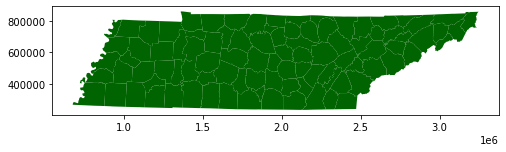

In [114]:
ax = Polygon.plot(figsize = (8, 10), color = 'darkgreen')
Triangles.plot( ax = ax, column ='geometry');
plt.show();
#Triangles.info()

In [99]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        104 non-null    object  
 1   SHAPE_AREA  104 non-null    float64 
 2   SHAPE_LEN   104 non-null    float64 
 3   geometry_x  104 non-null    geometry
 4   State       104 non-null    object  
 5   Shape       104 non-null    object  
 6   lat         104 non-null    float64 
 7   lng         104 non-null    float64 
 8   geometry_y  104 non-null    geometry
 9   County_     104 non-null    object  
dtypes: float64(4), geometry(2), object(4)
memory usage: 8.9+ KB


In [86]:
counties['geometry_y']= counties.geometry_y.astype(geometry)

NameError: name 'geometry' is not defined

In [87]:
AP_TN.info()
AP_TN= AP_TN.GeoDataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 29 to 5121
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      108 non-null    object 
 1   State     108 non-null    object 
 2   Shape     108 non-null    object 
 3   lat       108 non-null    float64
 4   lng       108 non-null    float64
 5   geometry  108 non-null    object 
 6   County_   104 non-null    object 
dtypes: float64(2), object(5)
memory usage: 10.8+ KB
